# Notebook d'évaluation des items de TP

On analyse les donnés et on initialise des réseaux de neurones

* Epoch 0 -- Error :   Train : 1.4577    Validation : 0.5117
* Epoch 10 -- Error :   Train : 0.0610    Validation : 0.0669
* Epoch 20 -- Error :   Train : 0.0407    Validation : 0.0449
* Epoch 30 -- Error :   Train : 0.0313    Validation : 0.0340
* Epoch 40 -- Error :   Train : 0.0260    Validation : 0.0280
* Epoch 50 -- Error :   Train : 0.0232    Validation : 0.0249
* Epoch 60 -- Error :   Train : 0.0215    Validation : 0.0232
* Epoch 70 -- Error :   Train : 0.0203    Validation : 0.0219
* Epoch 80 -- Error :   Train : 0.0194    Validation : 0.0206
* Epoch 90 -- Error :   Train : 0.0185    Validation : 0.0196
* Epoch 100 -- Error :   Train : 0.0177    Validation : 0.0189
* Epoch 110 -- Error :   Train : 0.0170    Validation : 0.0181
* Epoch 120 -- Error :   Train : 0.0163    Validation : 0.0176
* Epoch 130 -- Error :   Train : 0.0157    Validation : 0.0169
* Epoch 140 -- Error :   Train : 0.0151    Validation : 0.0163
* Epoch 150 -- Error :   Train : 0.0146    Validation : 0.0158
* E

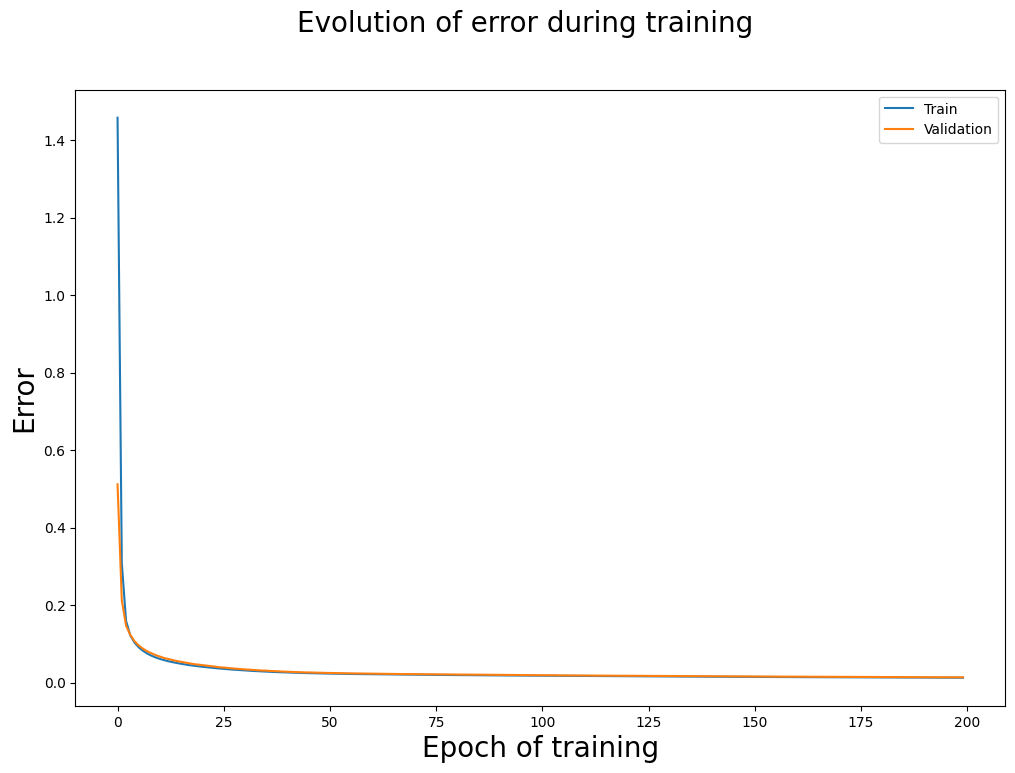

* Epoch 0 -- Error :   Train : 3.1319    Validation : 0.4602
* Epoch 10 -- Error :   Train : 0.0704    Validation : 0.0855
* Epoch 20 -- Error :   Train : 0.0436    Validation : 0.0520
* Epoch 30 -- Error :   Train : 0.0315    Validation : 0.0364
* Epoch 40 -- Error :   Train : 0.0263    Validation : 0.0298
* Epoch 50 -- Error :   Train : 0.0233    Validation : 0.0260
* Epoch 60 -- Error :   Train : 0.0211    Validation : 0.0234
* Epoch 70 -- Error :   Train : 0.0195    Validation : 0.0218
* Epoch 80 -- Error :   Train : 0.0180    Validation : 0.0197
* Epoch 90 -- Error :   Train : 0.0168    Validation : 0.0183
* Epoch 100 -- Error :   Train : 0.0157    Validation : 0.0171
* Epoch 110 -- Error :   Train : 0.0148    Validation : 0.0159
* Epoch 120 -- Error :   Train : 0.0140    Validation : 0.0150
* Epoch 130 -- Error :   Train : 0.0134    Validation : 0.0143
* Epoch 140 -- Error :   Train : 0.0128    Validation : 0.0136
* Epoch 150 -- Error :   Train : 0.0123    Validation : 0.0131
* E

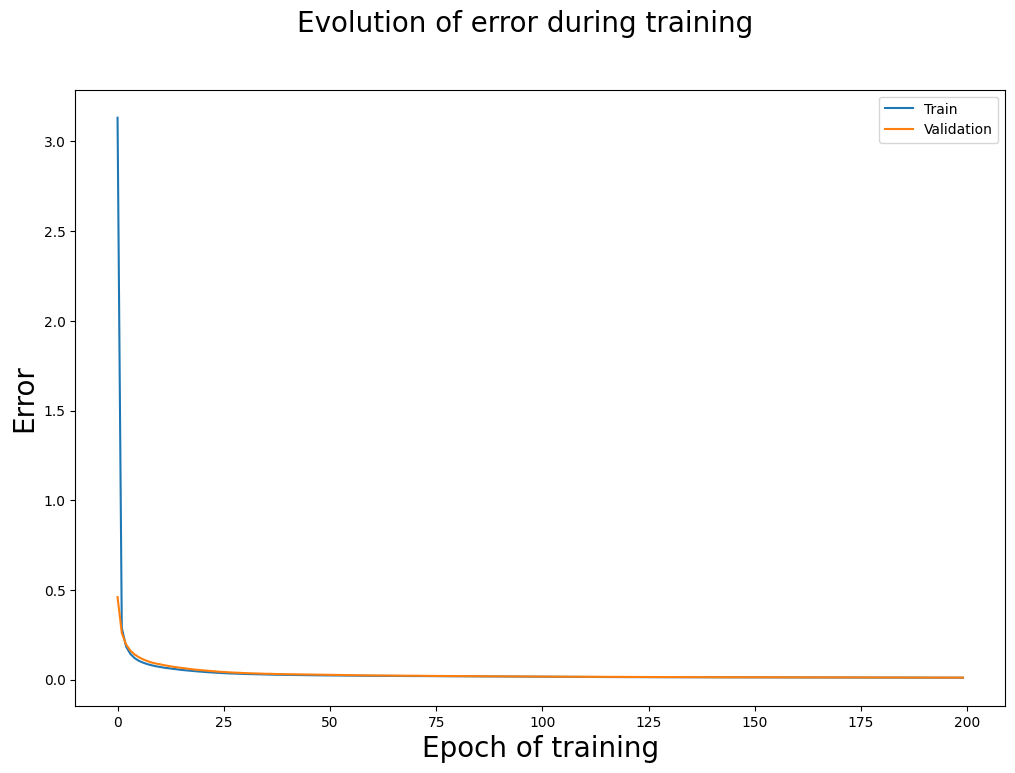

* Epoch 0 -- Error :   Train : 3.4490    Validation : 0.4086
* Epoch 10 -- Error :   Train : 0.0545    Validation : 0.0603
* Epoch 20 -- Error :   Train : 0.0328    Validation : 0.0367
* Epoch 30 -- Error :   Train : 0.0234    Validation : 0.0270
* Epoch 40 -- Error :   Train : 0.0184    Validation : 0.0215
* Epoch 50 -- Error :   Train : 0.0155    Validation : 0.0182
* Epoch 60 -- Error :   Train : 0.0135    Validation : 0.0162
* Epoch 70 -- Error :   Train : 0.0121    Validation : 0.0146
* Epoch 80 -- Error :   Train : 0.0110    Validation : 0.0134
* Epoch 90 -- Error :   Train : 0.0101    Validation : 0.0123
* Epoch 100 -- Error :   Train : 0.0093    Validation : 0.0115
* Epoch 110 -- Error :   Train : 0.0087    Validation : 0.0107
* Epoch 120 -- Error :   Train : 0.0081    Validation : 0.0101
* Epoch 130 -- Error :   Train : 0.0076    Validation : 0.0096
* Epoch 140 -- Error :   Train : 0.0072    Validation : 0.0090
* Epoch 150 -- Error :   Train : 0.0068    Validation : 0.0086
* E

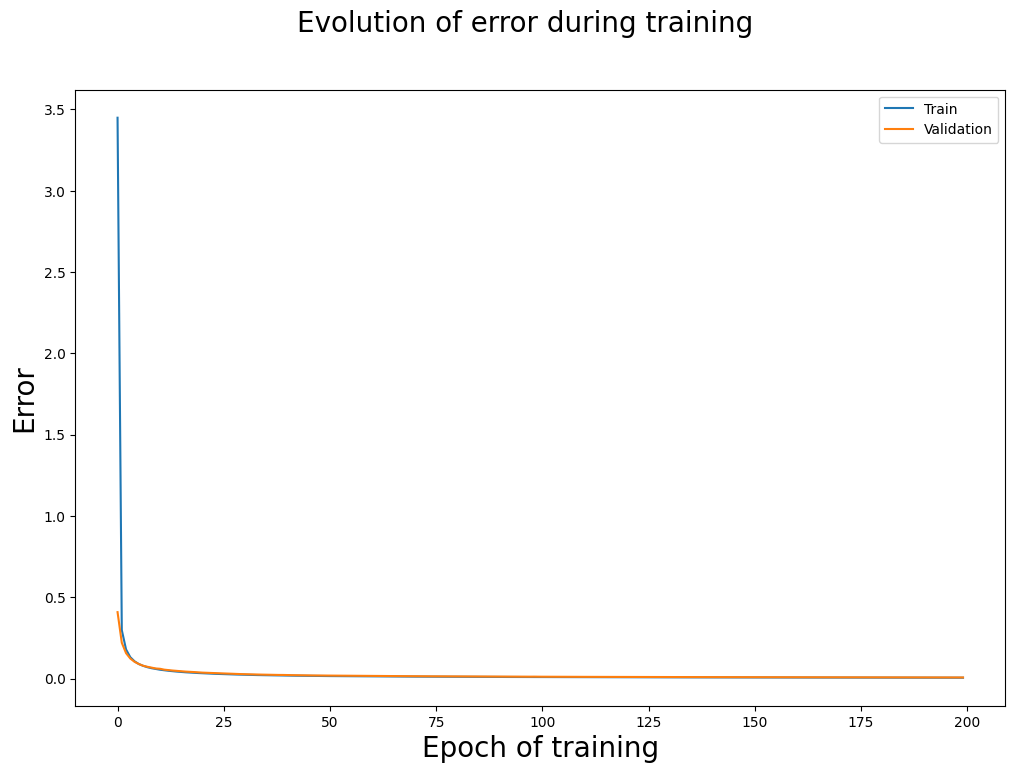

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import NeuralNet

# Load data
df = pd.read_csv('iris_extended.csv')

# Encode the soil_type column by -1, 0, 1
df['soil_type'] = df['soil_type'].astype('category').cat.codes - 1

# Extraite features and labels with normalizing
df_columns = df.columns.values.tolist()
features = df_columns[1:]
df[features] = df[features].apply(lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1)
label_col = df_columns[0]
labels = df[label_col].to_numpy()
unique_labels = np.unique(labels)

# We have responses equal to the instances
X = df[features]
y = df[features]

# 1000 instances -- train, 200 instances -- test
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=200, random_state=42)

# Convert dataframes to numpy arrays
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_val, y_val = X_val.to_numpy(), y_val.to_numpy()
X_all, y_all = X.to_numpy(), y.to_numpy()

# Initialize a neural network
nn4 = NeuralNet.NeuralNet(hidden_layer_sizes=(16, 4, 16), activation='tahn', learning_rate=0.01, epoch=200, batch_size=10)
nn8 = NeuralNet.NeuralNet(hidden_layer_sizes=(16, 8, 16), activation='tahn', learning_rate=0.01, epoch=200, batch_size=10)
nn12 = NeuralNet.NeuralNet(hidden_layer_sizes=(16, 12, 16), activation='tahn', learning_rate=0.01, epoch=200, batch_size=10)

# Fit the model
nn4.fit(X_train, y_train, X_val, y_val)
nn8.fit(X_train, y_train, X_val, y_val)
nn12.fit(X_train, y_train, X_val, y_val)

Les fonctions utiles

In [12]:
def get_best_50_percent_instances(nn=nn8):
    """
    Find the 50% of instances with the lowest reconstruction cost

    Parameters:
      nn: model
    Returns:
      X_50: 50% of instances
      X_50_comp: their compressed representations
      labels_50: their class labels, used for visualization iris type
    """

    all_errors = np.square(np.subtract(nn.predict(X_all), y_all)).mean(axis=1) / 2

    median = np.median(all_errors)
    mask_50 = all_errors < median
    X_50 = X_all[mask_50, :]
    labels_50 = labels[mask_50]

    X_50_comp = nn.compresse(X_50)

    return X_50, X_50_comp, labels_50


def plot_PCA(nn=nn8):
    """
    Compares the PCA of the original and compressed data for the top 50% of instances with the lowest reconstruction cost

    Parameters:
      nn: model
    """

    pca = PCA(n_components=2)

    X_50, X_50_comp, labels_50 = get_best_50_percent_instances(nn)

    # PCA of instances (50% best)
    X_50_pca = pca.fit_transform(X_50)
    plt.figure(figsize=(12, 8))

    for lab in unique_labels:
        mask = labels_50 == lab
        plt.scatter(
            X_50_pca[mask, 0],
            X_50_pca[mask, 1],
            label=f"Espèce {lab}",
            alpha=0.7
        )

    plt.title('PCA of instances with the lowest reconstruction error')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True)
    plt.show()


    # PCA of compressed data (50% best)
    X_50_comp_pca = pca.fit_transform(X_50_comp)

    plt.figure(figsize=(12, 8))
    for lab in unique_labels:
        mask = labels_50 == lab
        plt.scatter(
            X_50_comp_pca[mask, 0],
            X_50_comp_pca[mask, 1],
            label=f"Espèce {lab}",
            alpha=0.7
        )

    plt.title('PCA of compressed data with the lowest reconstruction error')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True)
    plt.show()



#### Functions to compute average and std of reconstruction error
"""
Applies to all functions in this section.

Parameters:
  X : batch of instances
  y : corresponding targets
  nn : model
  make_plot : whether to generate a visualization of errors

  * plotting is skipped for mse_instance (no meaningful)
Returns:
  mean reconstruction error
"""

def mse_instance(X, y, nn, make_plot = False):

    return np.mean(np.square(np.subtract(nn.predict(X), y)), axis=1)


def mse_attribute(X, y, nn, make_plot = True):

    mse_par_attr = np.square(np.subtract(nn.predict(X), y))
    if make_plot:
        errors = mse_par_attr.T
        errors_names = [f"Atr {i + 1}" for i in range(20)]

        means = np.mean(errors, axis=1)
        stds = np.std(errors, axis=1)

        plt.figure(figsize=(12, 8))
        plt.errorbar(errors_names, means, yerr=stds, fmt='o', capsize=5, color='black')

        plt.title(f"Comparing reconstruction errors for different attributes")
        plt.ylabel('Value')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


    return np.mean(mse_par_attr, axis=0)


def mse_class(X, y, nn, make_plot = True):
    errors = []
    errors_mean = []
    for lab in unique_labels:
        mask = labels == lab
        X_lab, y_lab = X[mask], y[mask]

        mse_par_class = np.mean(np.square(np.subtract(nn.predict(X_lab), y_lab)), axis = 1)
        errors.append(mse_par_class)
        errors_mean.append(np.mean(mse_par_class))

    if make_plot:
        errors_names = [f"Class {i + 1}" for i in range(3)]

        stds = [np.std(m) for m in errors]

        plt.figure(figsize=(12, 8))
        plt.errorbar(errors_names, errors_mean, yerr=stds, fmt='o', capsize=5, color='black')

        plt.title(f"Comparing reconstruction errors for different classes")
        plt.ylabel('Value')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    return errors_mean




def plot_model_comparison(type):
    """
    Compares reconstruction errors by type across different models

    Parameters:
      type : criterion used for comparison (instance/attribute/class)

    """

    if type == 'instance':
        error_f = mse_instance
    elif type == 'attribute':
        error_f = mse_attribute
    elif type == 'classe':
        error_f = mse_class

    # array of errors for 3 models
    errors = [error_f(X_all, y_all, nn4, make_plot = False), error_f(X_all, y_all, nn8, make_plot = False), error_f(X_all, y_all, nn12, make_plot = False)]
    errors_names = [f"Model with {4 * i} latent features " for i in range(1, 4)]

    # Calculate mean and std of errors for each model
    means = [np.mean(m) for m in errors]
    stds = [np.std(m) for m in errors]


    # Plot the comparison of errors
    plt.figure(figsize=(12, 8))
    plt.errorbar(errors_names, means, yerr=stds, fmt='o', capsize=5, color='black')

    plt.title(f"Comparison of {type}s errors across 3 models")
    plt.ylabel('Error Value')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Item 1:
 Une instance du jeu de test est extraite aléatoirement, puis sa compression et sa reconstruction sont illustrées à l’aide du modèle entraîné.

In [13]:
ind = np.random.choice(len(X_val))
instance = X_val[ind:ind+1]

inst_compressed = nn8.compresse(instance)

inst_reconstructed = nn8.reconstruction(inst_compressed)

print("Instance:\n", instance, end="\n\n")
print("Compressed forme:\n", inst_compressed, end="\n\n")
print("Reconstruction:\n", inst_reconstructed)

Instance:
 [[-0.2866293  -1.         -0.66929134  0.02614379 -0.84593023 -0.79591837
  -0.33158562 -0.96219946 -0.66909795 -0.83727212  0.0845681  -0.69061466
   0.59098229  0.33061224 -0.86282579  0.31437356 -0.0824802  -0.19249924
  -0.8100525  -0.67417513]]

Compressed forme:
 [[ 0.63520362  1.40999583 -3.10242016  1.97600608  1.19109973  3.3117978
  -1.75199834 -0.91418255]]

Reconstruction:
 [[-0.26990671 -0.85981128 -0.59980134  0.1487529  -0.84566371 -0.81297139
  -0.04892207 -0.95278596 -0.66578203 -0.75286441  0.07248803 -0.71187004
   0.49101772  0.61752741 -0.83330376  0.22901742 -0.21425086  0.04788127
  -0.88041777 -0.70469914]]


### Item 2:
À l’aide des métriques d’évaluation, un graphique est construit pour comparer les moyennes et les écarts types de l’erreur de reconstruction pour chaque classe.



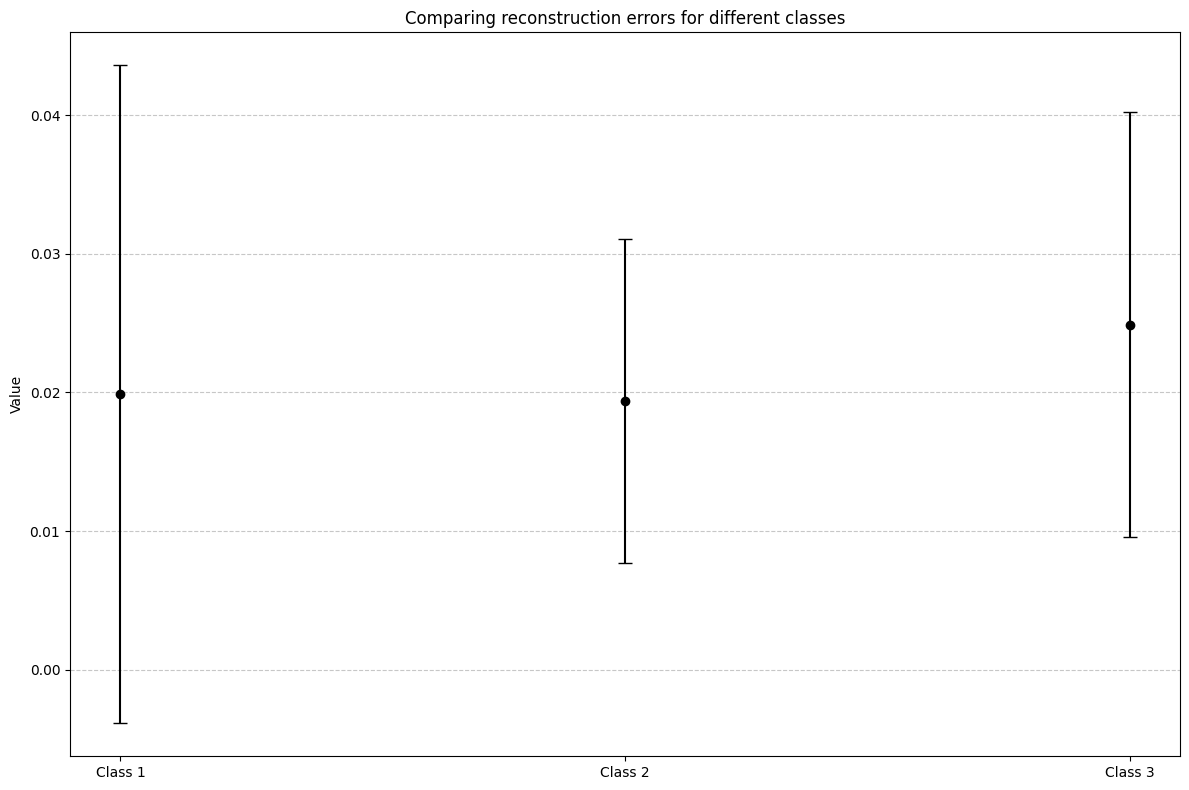

[np.float64(0.01986960368539343),
 np.float64(0.019394624811295266),
 np.float64(0.024907846568925432)]

In [14]:
mse_class(X, y, nn8)

La troisième classe est la plus difficile à reconstruire.

### Item 3:
L’analyse du graphique d’apprentissage des modèles montre qu’aucun d’entre eux n’est par sur-appris, car l’erreur sur les données de validation continue de diminuer.

### Item 4:
On sélectionne deux instances présentant des encodages similaires : la difference soit plus petit que 0.03

In [15]:
def MSE_cost(y_hat, y):
    mse = np.square(np.subtract(y_hat, y)).mean()
    return mse

inst_proches = []

found = False
for i in range(len(X_all)):
    if found:
        break
    for j in range(i + 1, len(X_all)):
        if MSE_cost(nn8.compresse(X_all[i]), nn8.compresse(X_all[j])) < 0.03:
                print("Difference between compressed vectors: ", MSE_cost(nn8.compresse(X_all[i]), nn8.compresse(X_all[j])))
                print("Difference between original vectors:   ", MSE_cost(X_all[i], X_all[j]))
                found = True
                break

Difference between compressed vectors:  0.013639927328313905
Difference between original vectors:    0.0028000083564230084


On voit que la difference entre les instances initiales est encore plus petit

### Item 5:
Visualisation des deux plus grandes erreurs pour certaines instances

In [16]:
# number of instances
k = 5

instances=[]
indexes = np.random.choice(len(X_all), size=k)
for ind in indexes:
    instances.append(X_all[ind:ind+1])

print()

for i in range(k):
    inst = instances[i]
    print(f"*INSTANCE {i + 1}*")

    print("Error:", MSE_cost(inst, nn8.predict(inst)))

    print("Two most significants attributes:")
    error = np.square(inst - nn8.predict(inst)).flatten()
    top2_indices = np.argsort(error)[-2:][::-1]
    top2_values = error[top2_indices]

    for idx, val in zip(top2_indices, top2_values):
        print(f"    Atr: {idx}, error: {val}")
    print()


*INSTANCE 1*
Error: 0.010264579842961417
Two most significants attributes:
    Atr: 0, error: 0.05951098406947411
    Atr: 5, error: 0.05322906082266867

*INSTANCE 2*
Error: 0.0075795787848649005
Two most significants attributes:
    Atr: 13, error: 0.05419846086339946
    Atr: 3, error: 0.02774493750560176

*INSTANCE 3*
Error: 0.012797709630298557
Two most significants attributes:
    Atr: 16, error: 0.04795094155809773
    Atr: 13, error: 0.035718953826463264

*INSTANCE 4*
Error: 0.008374992059666516
Two most significants attributes:
    Atr: 5, error: 0.03724848168229409
    Atr: 3, error: 0.022935251357037282

*INSTANCE 5*
Error: 0.004317804169116358
Two most significants attributes:
    Atr: 7, error: 0.01885066799468725
    Atr: 0, error: 0.010055902843290727



### Item 6:
La visualisation l’erreur de reconstruction moyenne des classes et des attributs pour la modèle nn8.


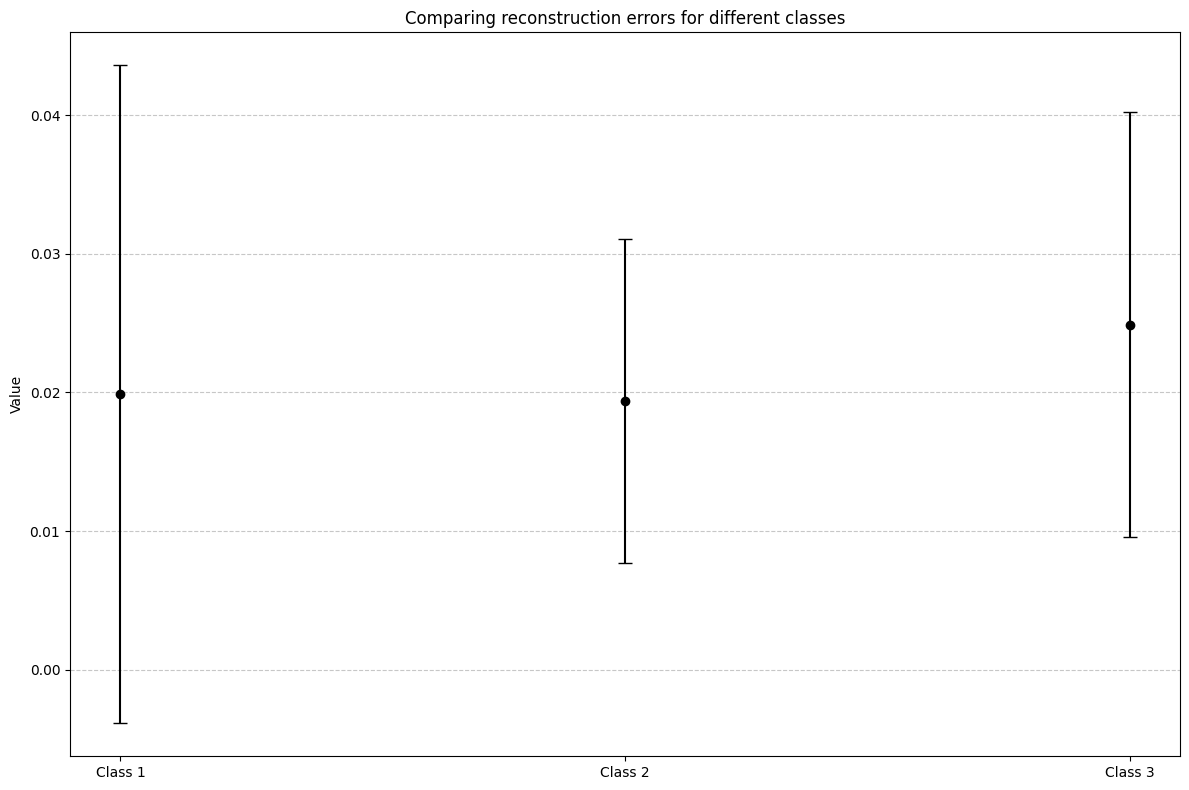

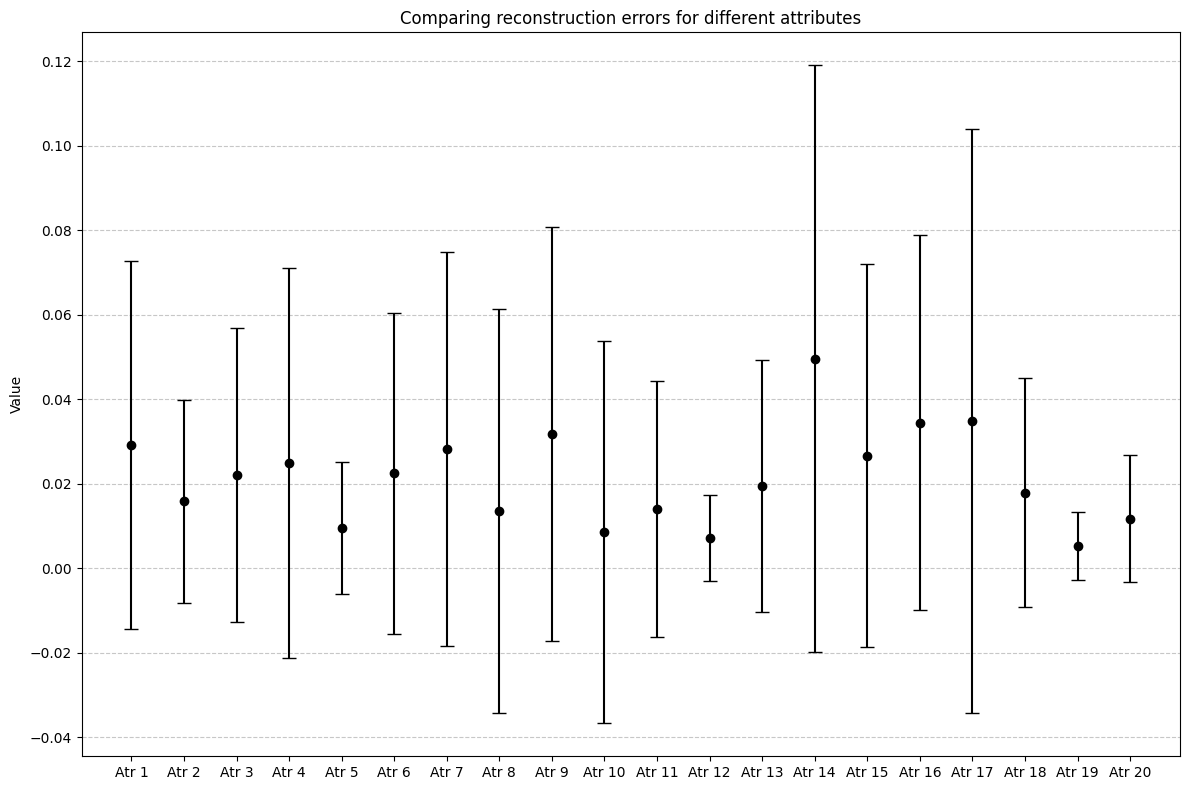

array([0.02920727, 0.01585954, 0.02205098, 0.02493214, 0.00957873,
       0.02256533, 0.02819533, 0.01358529, 0.03180168, 0.00851992,
       0.0141358 , 0.00724823, 0.01946455, 0.04963502, 0.02670198,
       0.03445853, 0.03493218, 0.01789414, 0.0053183 , 0.0117289 ])

In [17]:
mse_class(X, y, nn8)

mse_attribute(X_all, y_all, nn8)

### Item 7:
La visualisation des données encodées après ACP


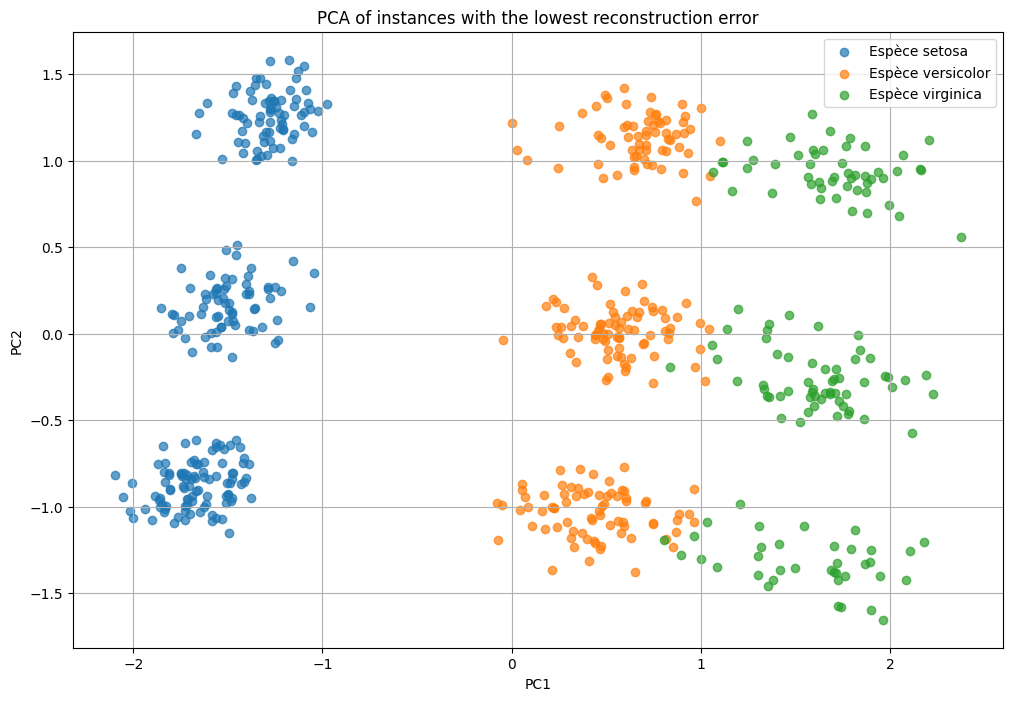

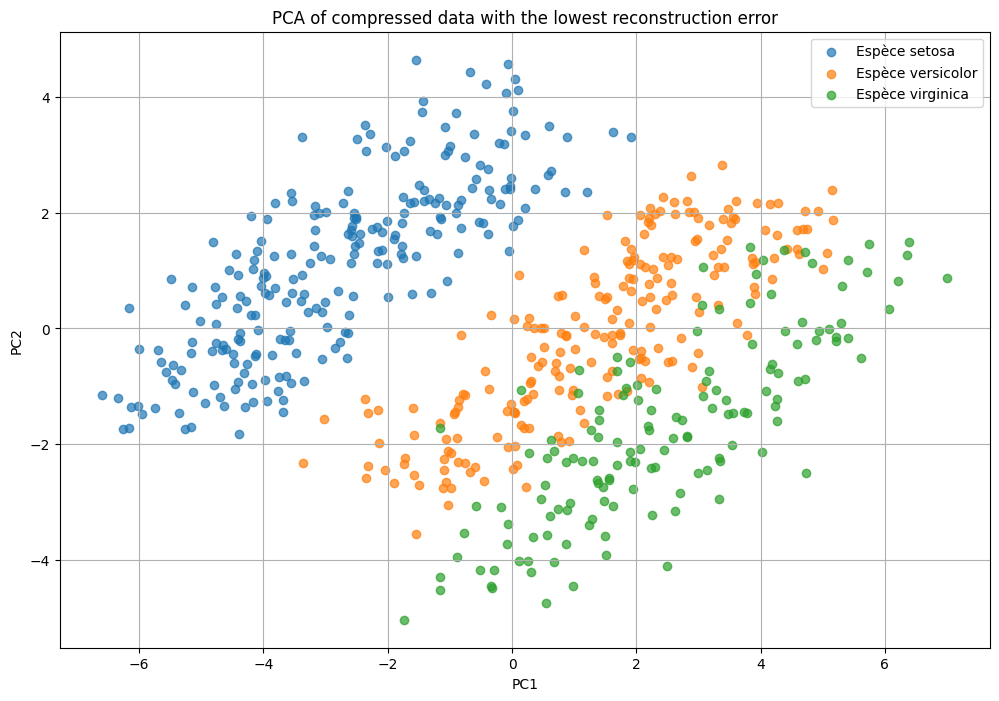

In [18]:
plot_PCA()

### Item 8:
Comparaison de reconstruction de deux des modèles differents.


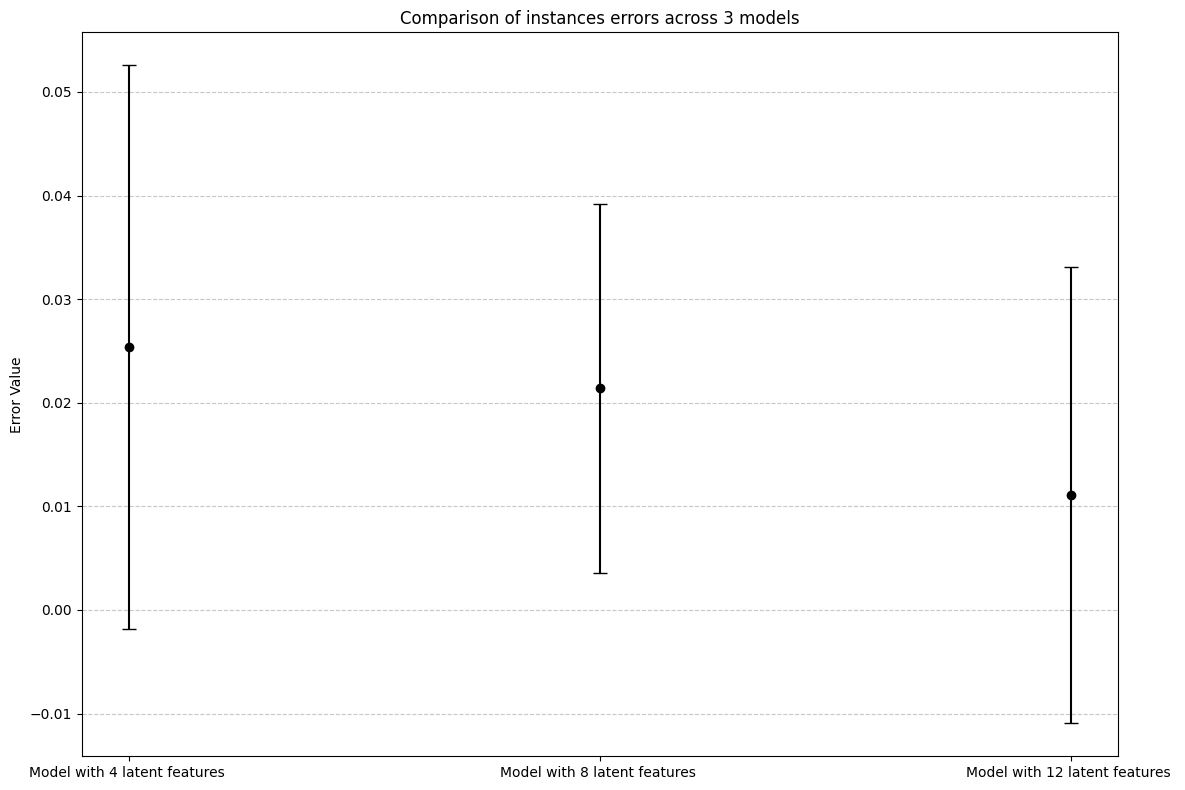

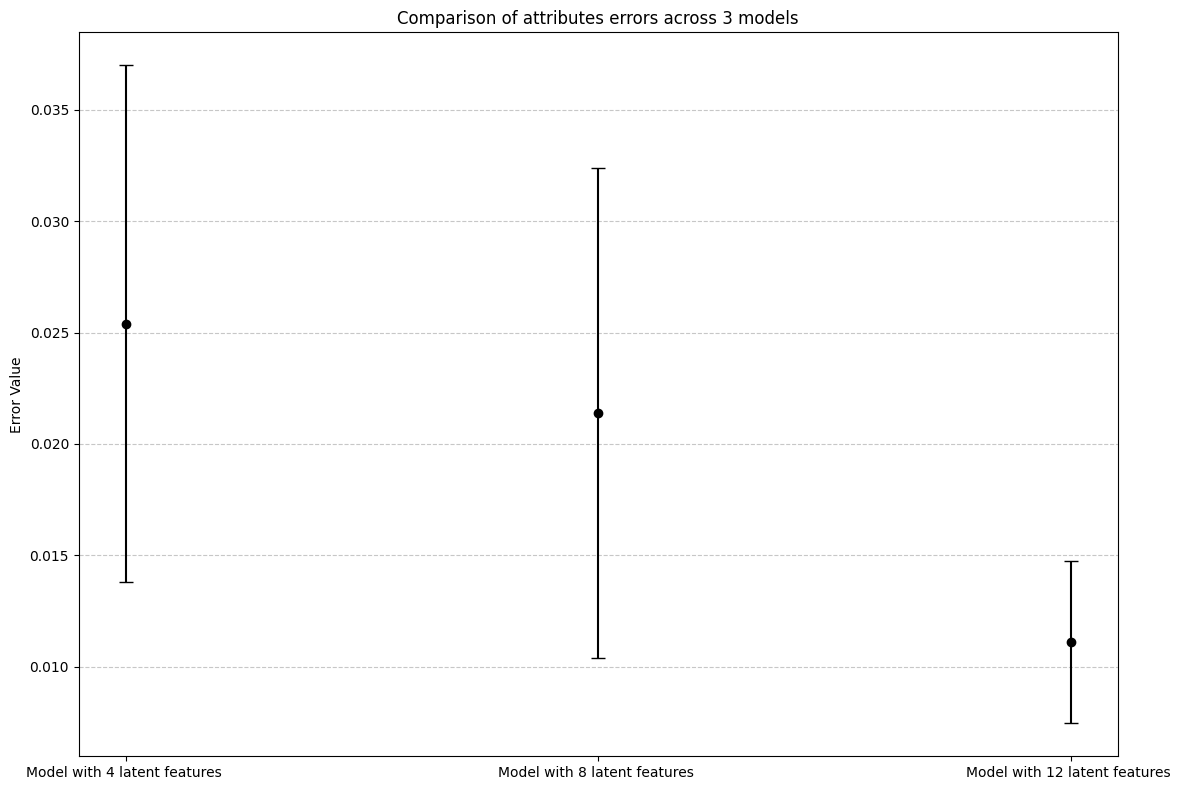

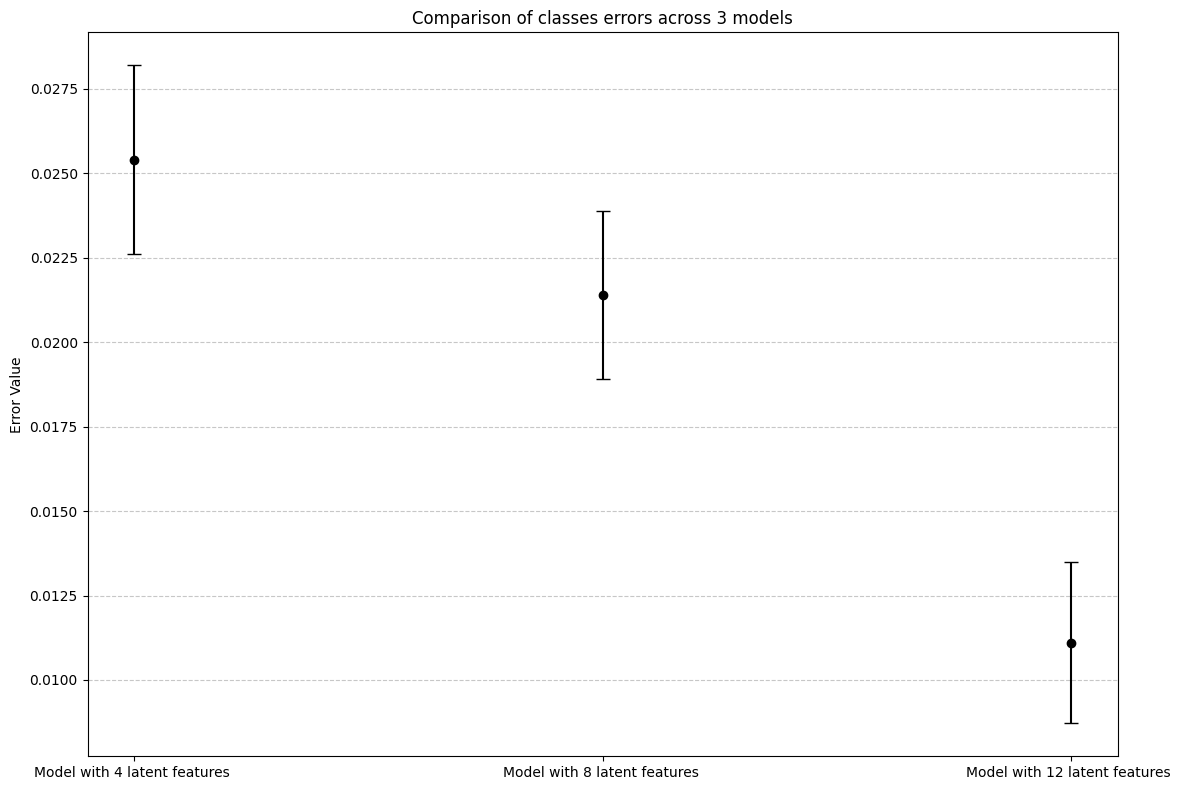

In [19]:
plot_model_comparison('instance')
plot_model_comparison('attribute')
plot_model_comparison('classe')
